# PCA essentials

__TEAM F__<br>
Chouliaras Andreas 2143<br>
Pappas Apostolos 2109


## Basics of PCA Analysis

Understanding the details of PCA requires knowledge of linear algebra. Here, we'll explain only the basics with simple graphical representation of the data.

In the Plot 1A below, the data are represented in the X-Y coordinate system. The dimension reduction is achieved by identifying the principal directions, called principal components, in which the data varies.

PCA assumes that the directions with the largest variances are the most "important" (i.e, the most principal).

In the figure below, the PC1 axis is the first principal direction along which the samples show the largest variation. The PC2 axis is the second most important direction and it is orthogonal to the PC1 axis.

The dimensionality of our two-dimensional data can be reduced to a single dimension by projecting each sample onto the first principal component (Plot 1B)

<img src="images/pca_plot1A.png" width= "400"/>
<img src="images/pca_plot1b.png" width= "400"/>

Technically speaking, the amount of variance retained by each principal component is measured by the so-called eigenvalue.

Note that, the PCA method is particularly useful when the variables within the data set are highly correlated. Correlation indicates that there is redundancy in the data. Due to this redundancy, PCA can be used to reduce the original variables into a smaller number of new variables ( = principal components) explaining most of the variance in the original variables.

<img src="images/pca_plot1.png" width= "400"/>
<img src="images/pca_hd.png" width= "400"/>

Taken together, the main purpose of principal component analysis is to:

* identify hidden pattern in a data set,
* reduce the dimensionnality of the data by 
* removing the noise and redundancy in the data,
* identify correlated variables


## Computations

### R packages

Several functions from different packages are available in the R software for computing PCA:

* prcomp() and princomp() [built-in R stats package],
* PCA() [FactoMineR package],
* dudi.pca() [ade4 package],
* and epPCA() [ExPosition package]

No matter what function you decide to use, you can easily extract and visualize the results of PCA using R functions provided in the factoextra R package.

> Here, we'll use the two packages FactoMineR (for the analysis) and factoextra (for ggplot2-based visualization).

We use the Analysis of Greek Regions dataset.

In [2]:
#Install the two packages as follow:
#install.packages(c("FactoMineR", "factoextra"))
#Load them in R, by typing this:
library("FactoMineR")
library("factoextra")

library("xlsx")

options(repr.plot.width=4, repr.plot.height=4)

job_perf <- read.xlsx("analysis_greek_regions.xlsx", sheetIndex = 2, stringsAsFactors = FALSE)
job_perf=job_perf[1:32, 1:16]
head(job_perf)

KEYWORDS,IONIAN.ISLANDS,PELOPONNESE,WESTERN.GREECE,NORTH.AEGEAN,EPIRUS,EAST.MACEDONIA.THRACE,CRETE,CENTRAL.MACEDONIA,ATTICA,THESSALY,CENTRAL.GREECE,SOUTH.AEGEAN,Western.Macedonia,Sum,max
agro-food,4,5,4,8,6,1,2,7,0,8,5,0,0,50,8
manufacturing,7,17,12,9,14,37,3,21,12,17,54,12,11,226,54
tourism,61,30,24,27,29,14,26,21,11,19,15,63,9,349,63
health,1,6,8,4,7,7,12,15,12,8,5,5,7,97,15
cluster,37,41,56,29,45,39,29,53,72,28,35,38,51,553,72
crop production,0,2,0,0,0,0,0,0,0,0,0,0,1,3,2


## Data standardization

In principal component analysis, variables are often scaled (i.e. standardized). This is particularly recommended when variables are measured in different scales (e.g: kilograms, kilometers, centimeters, .); otherwise, the PCA outputs obtained will be severely affected.

The goal is to make the variables comparable. Generally variables are scaled to have i) standard deviation one and ii) mean zero.

The standardization of data is an approach widely used in the context of gene expression data analysis before PCA and clustering analysis. We might also want to scale the data when the mean and/or the standard deviation of variables are largely different.

When scaling variables, the data can be transformed as follow:

$$\frac{x_i-mean(x)}{sd(x)}$$

Where $mean(x)$ is the mean of $x$ values, and $sd(x)$ is the standard deviation (SD).

The R base function scale() can be used to standardize the data. It takes a numeric matrix as an input and performs the scaling on the columns.

<--Note that, by default, the function PCA() [in FactoMineR], standardizes the data automatically during the PCA; so you don't need do this transformation before the PCA.-->

The function PCA() [FactoMineR package] can be used. A simplified format is :

> PCA(X, scale.unit = TRUE, ncp = 5, graph = TRUE)

* X: a data frame. Rows are individuals and columns are numeric variables
* scale.unit: a logical value. If TRUE, the data are scaled to unit variance before the analysis. This standardization to the same scale avoids some variables to become dominant just because of their large measurement units. It makes variable comparable.
* ncp: number of dimensions kept in the final results.
* graph: a logical value. If TRUE a graph is displayed.

The R code below, computes principal component analysis on the active individuals/variables:

In [3]:
res.pca <- PCA((job_perf[2:32, 2:14]), graph = FALSE)

The output of the function PCA() is a list, including the following components :

In [4]:
print(res.pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 31 individuals, described by 13 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

## Visualization and Interpretation

We'll use the factoextra R package to help in the interpretation of PCA. No matter what function you decide to use [stats::prcomp(), FactoMiner::PCA(), ade4::dudi.pca(), ExPosition::epPCA()], you can easily extract and visualize the results of PCA using R functions provided in the factoextra R package.

These functions include:

* get_eigenvalue(res.pca): Extract the eigenvalues/variances of principal components
* fviz_eig(res.pca): Visualize the eigenvalues get_pca_ind(res.pca), get_pca_var(res.pca): * Extract the results for individuals and variables, respectively.
* fviz_pca_ind(res.pca), fviz_pca_var(res.pca): Visualize the results individuals and variables, respectively.
* fviz_pca_biplot(res.pca): Make a biplot of individuals and variables.

In the next sections, we'll illustrate each of these functions.

## Eigenvalues / Variances

As described in previous sections, the eigenvalues measure the amount of variation retained by each principal component. Eigenvalues are large for the first PCs and small for the subsequent PCs. That is, the first PCs corresponds to the directions with the maximum amount of variation in the data set.

We examine the eigenvalues to determine the number of principal components to be considered. The eigenvalues and the proportion of variances (i.e., information) retained by the principal components (PCs) can be extracted using the function get_eigenvalue() [factoextra package].

In [5]:
eig.val <- get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,10.987461923,84.51893787,84.51894
Dim.2,0.699997220,5.38459400,89.90353
Dim.3,0.467792958,3.59840737,93.50194
Dim.4,0.269496936,2.07305335,95.57499
Dim.5,0.186771856,1.43670658,97.01170
Dim.6,0.134790092,1.03684687,98.04855
Dim.7,0.096989194,0.74607072,98.79462
Dim.8,0.055021596,0.42324304,99.21786
Dim.9,0.044302857,0.34079120,99.55865
Dim.10,0.029483875,0.22679904,99.78545


The sum of all the eigenvalues give a total variance of 10.

The proportion of variation explained by each eigenvalue is given in the second column. For example, 4.124 divided by 10 equals 0.4124, or, about 41.24% of the variation is explained by this first eigenvalue. The cumulative percentage explained is obtained by adding the successive proportions of variation explained to obtain the running total. For instance, 41.242% plus 18.385% equals 59.627%, and so forth. Therefore, about 59.627% of the variation is explained by the first two eigenvalues together.

Eigenvalues can be used to determine the number of principal components to retain after PCA (Kaiser 1961):

> An eigenvalue > 1 indicates that PCs account for more variance than accounted by one of the original variables in standardized data. This is commonly used as a cutoff point for which PCs are retained. This holds true only when the data are standardized.

You can also limit the number of component to that number that accounts for a certain fraction of the total variance. For example, if you are satisfied with 70% of the total variance explained then use the number of components to achieve that.

Unfortunately, there is no well-accepted objective way to decide how many principal components are enough. This will depend on the specific field of application and the specific data set. In practice, we tend to look at the first few principal components in order to find interesting patterns in the data.

In our analysis, the first three principal components explain 72% of the variation. This is an acceptably large percentage.

An alternative method to determine the number of principal components is to look at a Scree Plot, which is the plot of eigenvalues ordered from largest to the smallest. The number of component is determined at the point, beyond which the remaining eigenvalues are all relatively small and of comparable size (Jollife 2002, Peres-Neto, Jackson, and Somers (2005)).

The scree plot can be produced using the function fviz_eig() or fviz_screeplot() [factoextra package].

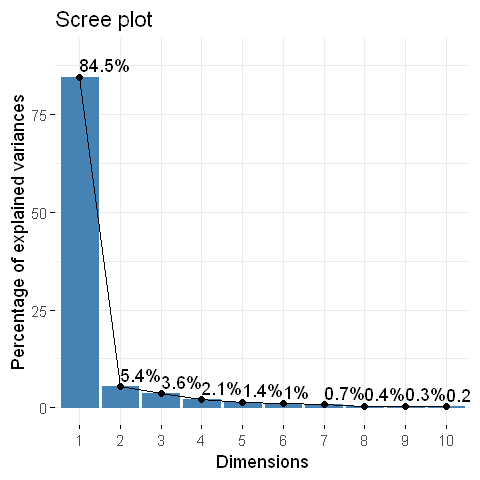

In [6]:
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 90))

> From the plot above, we might want to stop at the fifth principal component. 97% of the information (variances) contained in the data are retained by the first five principal components.

## Graph of variables

## Results

A simple method to extract the results, for variables, from a PCA output is to use the function get_pca_var() [factoextra package]. This function provides a list of matrices containing all the results for the active variables (coordinates, correlation between variables and axes, squared cosine and contributions)

In [7]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

The components of the get_pca_var() can be used in the plot of variables as follow:

* __var$coord__: coordinates of variables to create a scatter plot

* __var$cos2__: represents the quality of representation for variables on the factor map. It's calculated as the squared coordinates: var.cos2 = var.coord * var.coord.

* __var$contrib__: contains the contributions (in percentage) of the variables to the principal components. The contribution of a variable (var) to a given principal component is (in percentage) : (var.cos2 * 100) / (total cos2 of the component).

>Note that, it's possible to plot variables and to color them according to either i) their quality on the factor map (cos2) or ii) their contribution values to the principal components (contrib).

The different components can be accessed as follow:

In [8]:
#Coordinates
head(var$coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
IONIAN.ISLANDS,0.8438366,0.50419959,0.117516467,0.06806949,0.05250366
PELOPONNESE,0.9686634,0.05601669,0.074786465,0.01071735,-0.12149165
WESTERN.GREECE,0.9747250,-0.05973020,-0.146341700,0.02144164,-0.06756771
NORTH.AEGEAN,0.9326548,0.14594011,-0.110016529,-0.05766914,-0.11648076
EPIRUS,0.9597891,0.04437470,0.007649183,-0.08731553,-0.21496408
EAST.MACEDONIA.THRACE,0.8988198,-0.24300948,0.311939256,0.02792868,-0.05973307


In [9]:
# Cos2: quality on the factore map
head(var$cos2)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
IONIAN.ISLANDS,0.7120602,0.254217231,0.013810120,0.0046334550,0.002756634
PELOPONNESE,0.9383087,0.003137870,0.005593015,0.0001148615,0.014760220
WESTERN.GREECE,0.9500888,0.003567696,0.021415893,0.0004597438,0.004565395
NORTH.AEGEAN,0.8698450,0.021298517,0.012103637,0.0033257302,0.013567767
EPIRUS,0.9211951,0.001969114,0.000058510,0.0076240012,0.046209555
EAST.MACEDONIA.THRACE,0.8078771,0.059053609,0.097306099,0.0007800113,0.003568040


In [10]:
# Contributions to the principal components
head(var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
IONIAN.ISLANDS,6.480661,36.3168916,2.95218640,1.71929786,1.475936
PELOPONNESE,8.539813,0.4482689,1.19561770,0.04262071,7.902807
WESTERN.GREECE,8.647027,0.5096729,4.57807090,0.17059334,2.444370
NORTH.AEGEAN,7.916706,3.0426573,2.58739181,1.23405122,7.264353
EPIRUS,8.384057,0.2813031,0.01250767,2.82897509,24.741177
EAST.MACEDONIA.THRACE,7.352718,8.4362633,20.80110386,0.28943234,1.910374


In this section, we describe how to visualize variables and draw conclusions about their correlations. Next, we highlight variables according to either i) their quality of representation on the factor map or ii) their contributions to the principal components.

## Correlation circle
The correlation between a variable and a principal component (PC) is used as the coordinates of the variable on the PC. The representation of variables differs from the plot of the observations: The observations are represented by their projections, but the variables are represented by their correlations (Abdi and Williams 2010).

In [11]:
# Coordinates of variables
head(var$coord, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
IONIAN.ISLANDS,0.8438366,0.50419959,0.11751647,0.06806949,0.05250366
PELOPONNESE,0.9686634,0.05601669,0.07478647,0.01071735,-0.12149165
WESTERN.GREECE,0.9747250,-0.05973020,-0.14634170,0.02144164,-0.06756771
NORTH.AEGEAN,0.9326548,0.14594011,-0.11001653,-0.05766914,-0.11648076


To plot variables, type this:

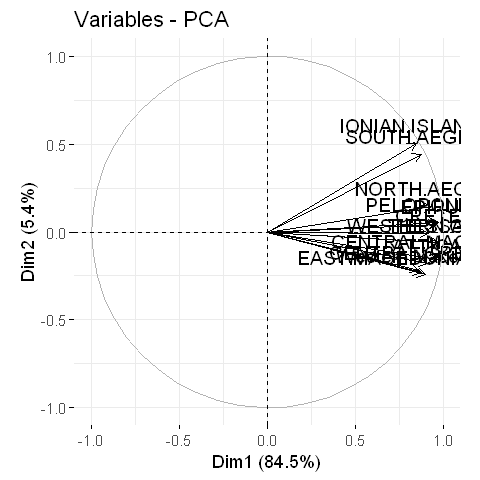

In [12]:
fviz_pca_var(res.pca, col.var = "black")

The plot above is also known as variable correlation plots. It shows the relationships between all variables. It can be interpreted as follow:

* Positively correlated variables are grouped together.
* Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
* The distance between variables and the origin measures the quality of the variables on the factor map. Variables that are away from the origin are well represented on the factor map.

## Quality of representation

The quality of representation of the variables on factor map is called cos2 (square cosine, squared coordinates) . You can access to the cos2 as follow:

In [13]:
head(var$cos2, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
IONIAN.ISLANDS,0.7120602,0.254217231,0.013810120,0.0046334550,0.002756634
PELOPONNESE,0.9383087,0.003137870,0.005593015,0.0001148615,0.014760220
WESTERN.GREECE,0.9500888,0.003567696,0.021415893,0.0004597438,0.004565395
NORTH.AEGEAN,0.8698450,0.021298517,0.012103637,0.0033257302,0.013567767


You can visualize the cos2 of variables on all the dimensions using the corrplot package:

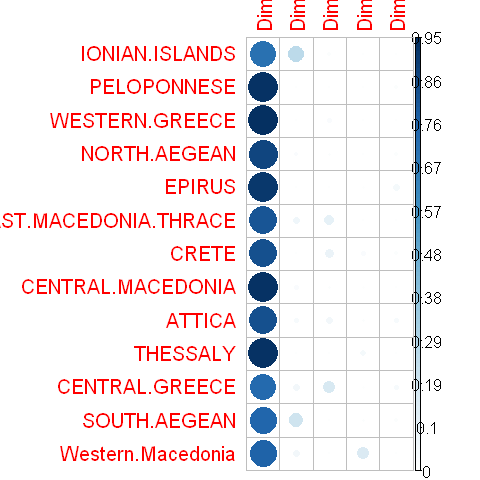

In [15]:
library(corrplot)
corrplot(var$cos2, is.corr=FALSE)

It's also possible to create a bar plot of variables cos2 using the function fviz_cos2()[in factoextra]:

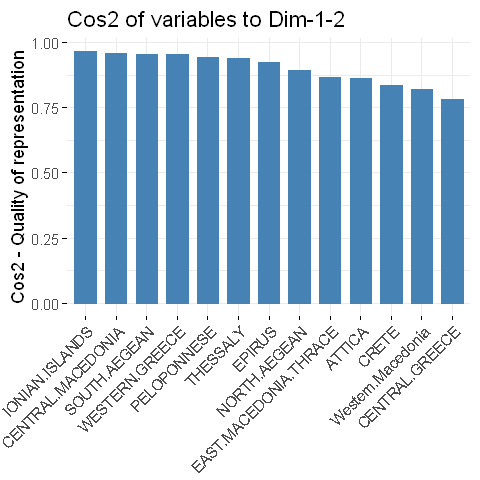

In [16]:
# Total cos2 of variables on Dim.1 and Dim.2
fviz_cos2(res.pca, choice = "var", axes = 1:2)

< --Note that,

* A high cos2 indicates a good representation of the variable on the principal component. In this case the variable is positioned close to the circumference of the correlation circle.

* A low cos2 indicates that the variable is not perfectly represented by the PCs. In this case the variable is close to the center of the circle. -->

For a given variable, the sum of the cos2 on all the principal components is equal to one.

If a variable is perfectly represented by only two principal components (Dim.1 & Dim.2), the sum of the cos2 on these two PCs is equal to one. In this case the variables will be positioned on the circle of correlations.

For some of the variables, more than 2 components might be required to perfectly represent the data. In this case the variables are positioned inside the circle of correlations.

In summary:

> The cos2 values are used to estimate the quality of the representation
* The closer a variable is to the circle of correlations, the better its representation on the factor map (and the more important it is to interpret these components)
* Variables that are closed to the center of the plot are less important for the first components.

It's possible to color variables by their cos2 values using the argument col.var = "cos2". This produces a gradient colors. In this case, the argument gradient.cols can be used to provide a custom color. For instance, gradient.cols = c("white", "blue", "red") means that:

* variables with low cos2 values will be colored in "white"
* variables with mid cos2 values will be colored in "blue"
* variables with high cos2 values will be colored in "red"

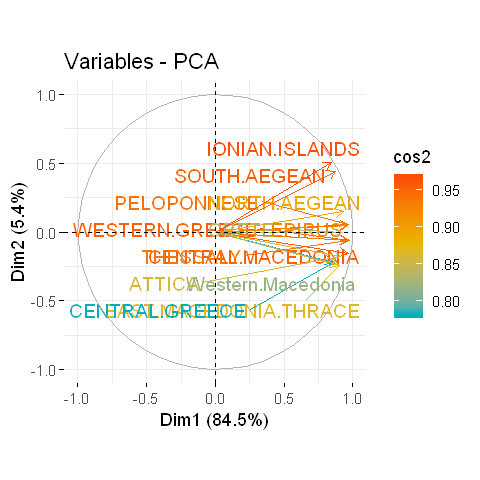

In [17]:
# Color by cos2 values: quality on the factor map
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
)

Note that, it's also possible to change the transparency of the variables according to their cos2 values using the option

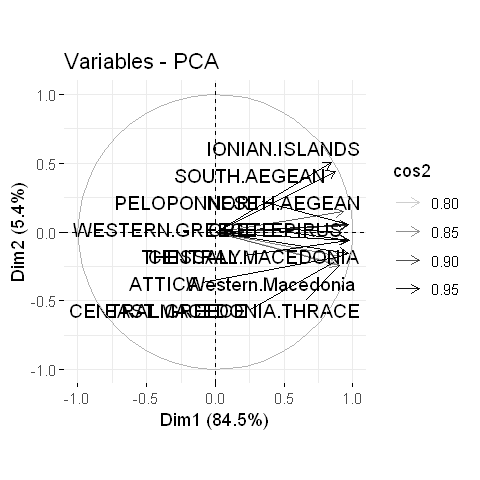

In [18]:
# Change the transparency by cos2 values
fviz_pca_var(res.pca, alpha.var = "cos2",repel = TRUE)

## Contributions of variables to PCs
The contributions of variables in accounting for the variability in a given principal component are expressed in percentage.

* Variables that are correlated with PC1 (i.e., Dim.1) and PC2 (i.e., Dim.2) are the most important in explaining the variability in the data set.
* Variables that do not correlated with any PC or correlated with the last dimensions are variables with low contribution and might be removed to simplify the overall analysis.

The contribution of variables can be extracted as follow :

In [20]:
head(var$contrib, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
IONIAN.ISLANDS,6.480661,36.3168916,2.952186,1.71929786,1.475936
PELOPONNESE,8.539813,0.4482689,1.195618,0.04262071,7.902807
WESTERN.GREECE,8.647027,0.5096729,4.578071,0.17059334,2.444370
NORTH.AEGEAN,7.916706,3.0426573,2.587392,1.23405122,7.264353


> The larger the value of the contribution, the more the variable contributes to the component.

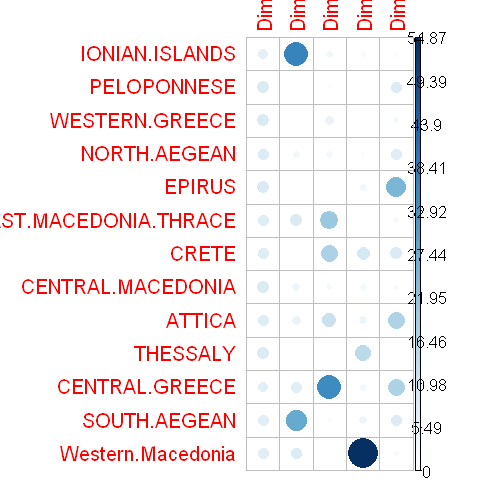

In [19]:
library(corrplot)
corrplot(var$contrib, is.corr=FALSE)  

The function fviz_contrib() [factoextra package] can be used to draw a bar plot of variable contributions. If your data contains many variables, you can decide to show only the top contributing variables. The R code below shows the top 10 variables contributing to the principal components:

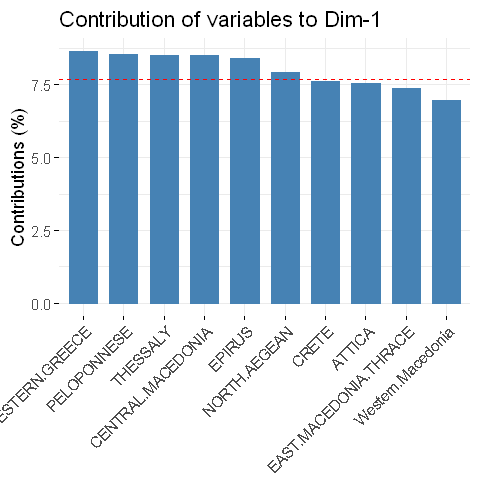

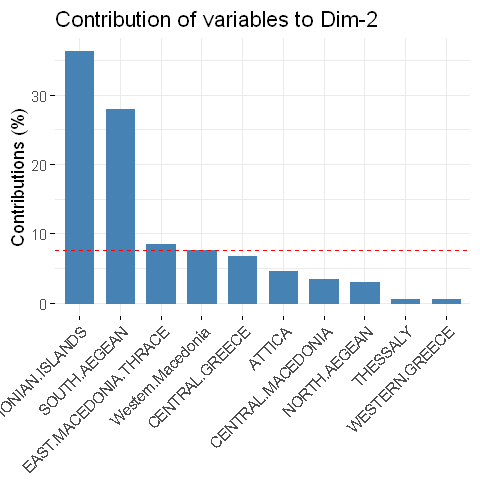

In [117]:
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)

# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)

The total contribution to PC1 and PC2 is obtained with the following R code:

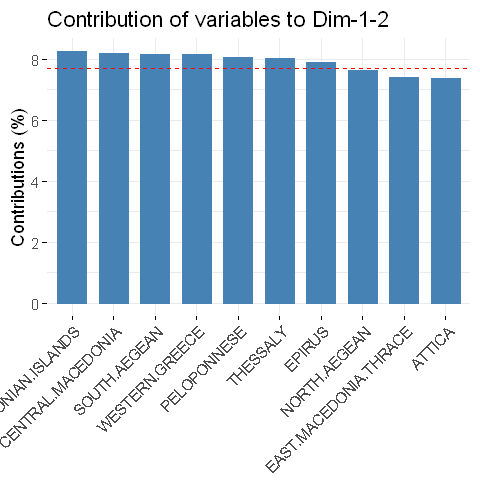

In [21]:
fviz_contrib(res.pca, choice = "var", axes = 1:2, top = 10)

The red dashed line on the graph above indicates the expected average contribution. If the contribution of the variables were uniform, the expected value would be 1/length(variables) = 1/10 = 10%. For a given component, a variable with a contribution larger than this cutoff could be considered as important in contributing to the component.

Note that, the total contribution of a given variable, on explaining the variations retained by two principal components, say PC1 and PC2, is calculated as contrib = [(C1 * Eig1) + (C2 * Eig2)]/(Eig1 + Eig2), where

* C1 and C2 are the contributions of the variable on PC1 and PC2, respectively
* Eig1 and Eig2 are the eigenvalues of PC1 and PC2, respectively. Recall that eigenvalues measure the amount of variation retained by each PC.

In this case, the expected average contribution (cutoff) is calculated as follow: As mentioned above, if the contributions of the 10 variables were uniform, the expected average contribution on a given PC would be 1/10 = 10%. The expected average contribution of a variable for PC1 and PC2 is : [(10* Eig1) + (10 * Eig2)]/(Eig1 + Eig2)

>It can be seen that the variables - X100m, Long.jump and Pole.vault - contribute the most to the dimensions 1 and 2.

The most important (or, contributing) variables can be highlighted on the correlation plot as follow:

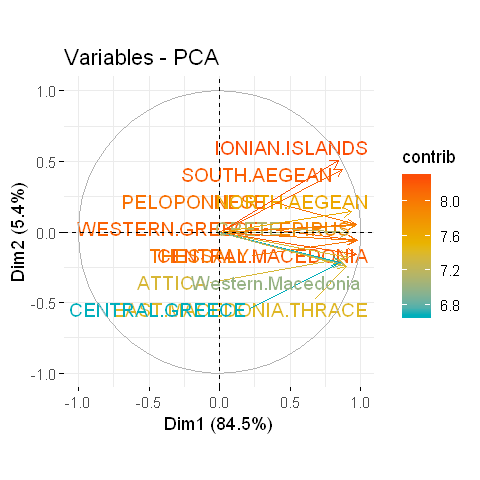

In [22]:
fviz_pca_var(res.pca, col.var = "contrib",
             repel = TRUE, # Avoid text overlapping
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"))

Note that, it's also possible to change the transparency of variables according to their contrib values using the option alpha.var = "contrib". For example, type this:

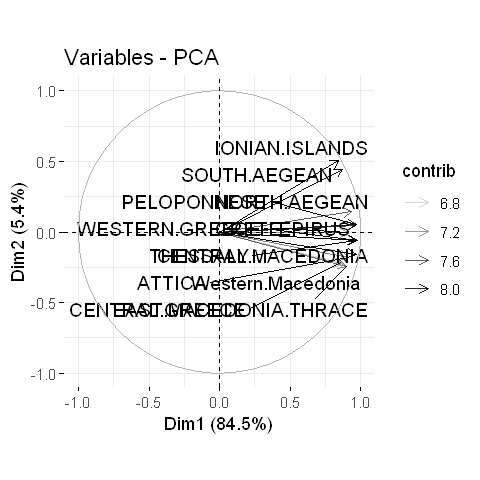

In [23]:
# Change the transparency by contrib values
fviz_pca_var(res.pca, alpha.var = "contrib",
             repel = TRUE, # Avoid text overlapping
            )

## Color by a custom continuous variable

In the previous sections, we showed how to color variables by their contributions and their cos2. Note that, it's possible to color variables by any custom continuous variable. The coloring variable should have the same length as the number of active variables in the PCA (here n = 10).

For example, type this:

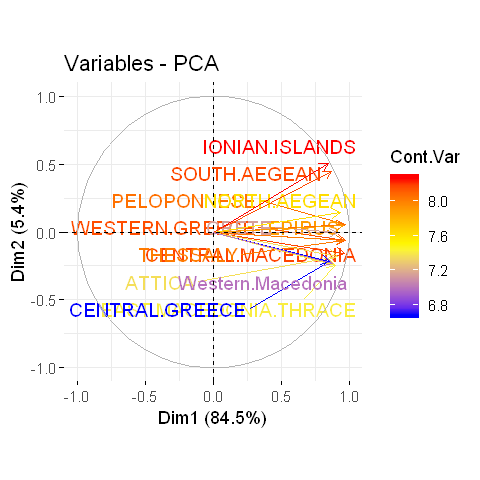

In [24]:
set.seed(123)
# Color variables by the continuous variable
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("blue", "yellow", "red"),
             repel = TRUE, # Avoid text overlapping
             legend.title = "Cont.Var")

## Color by groups
It's also possible to change the color of variables by groups defined by a qualitative/categorical variable, also called factor in R terminology.

As we don't have any grouping variable in our data sets for classifying variables, we'll create it.

In the following demo example, we start by classifying the variables into 3 groups using the kmeans clustering algorithm. Next, we use the clusters returned by the kmeans algorithm to color variables.

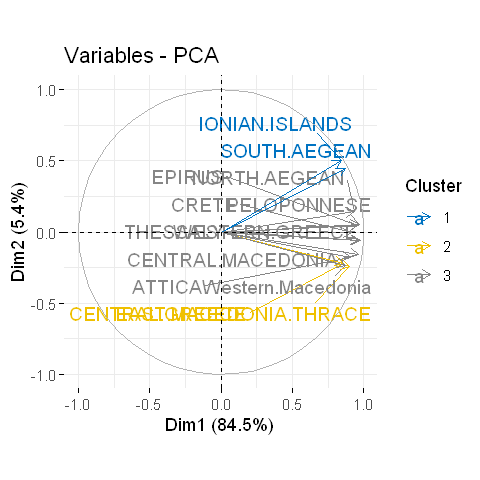

In [25]:
# Create a grouping variable using kmeans
# Create 3 groups of variables (centers = 3)
set.seed(123)
res.km <- kmeans(var$coord, centers = 3, nstart = 25)
grp <- as.factor(res.km$cluster)
# Color variables by groups
fviz_pca_var(res.pca, col.var = grp, 
             repel = TRUE,
             palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
             legend.title = "Cluster")


## Dimension description
In the section @ref(pca-variable-contributions), we described how to highlight variables according to their contributions to the principal components.

Note also that, the function dimdesc() [in FactoMineR], for dimension description, can be used to identify the most significantly associated variables with a given principal component . It can be used as follow:

In [26]:
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1
res.desc$Dim.1

,correlation,p.value
WESTERN.GREECE,0.9747250,2.001021e-20
PELOPONNESE,0.9686634,4.346671e-19
THESSALY,0.9663744,1.190533e-18
CENTRAL.MACEDONIA,0.9655330,1.694484e-18
EPIRUS,0.9597891,1.526346e-17
NORTH.AEGEAN,0.9326548,2.264042e-14
CRETE,0.9141444,6.784906e-13
ATTICA,0.9105673,1.197821e-12
EAST.MACEDONIA.THRACE,0.8988198,6.636644e-12
Western.Macedonia,0.8740133,1.352558e-10


In [27]:
# Description of dimension 2
res.desc$Dim.2

,correlation,p.value
IONIAN.ISLANDS,0.5041996,0.003826198
SOUTH.AEGEAN,0.4421219,0.012763126


In the output above, $quanti means results for quantitative variables. Note that, variables are sorted by the p-value of the correlation.

## Graph of individuals

## Results

The results, for individuals can be extracted using the function get_pca_ind() [factoextra package]. Similarly to the get_pca_var(), the function get_pca_ind() provides a list of matrices containing all the results for the individuals (coordinates, correlation between individuals and axes, squared cosine and contributions)

In [28]:
ind <- get_pca_ind(res.pca)
ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

To get access to the different components, use this:

In [30]:
# Coordinates of individuals
head(ind$coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
2,1.098709,-1.4982589,2.78341939,-0.62354014,0.59759473
3,3.030540,3.6802743,0.65111507,0.02320872,0.15719966
4,-1.421855,-0.3232222,-0.48652898,-0.18702113,0.20270660
5,6.558512,-0.6840848,0.06570786,1.22922455,-0.16114901
6,-3.054365,0.1065432,-0.27551029,0.04587739,0.09159536
7,-2.272613,0.5182831,-0.33104026,0.05346094,0.52510140


In [31]:
# Quality of individuals
head(ind$cos2)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
2,0.09963356,0.18527372,6.394365e-01,3.208994e-02,0.0294749880
3,0.39128747,0.57705391,1.806224e-02,2.294871e-05,0.0010528323
4,0.79540371,0.04110354,9.313099e-02,1.376126e-02,0.0161663719
5,0.92048792,0.01001445,9.239364e-05,3.233478e-02,0.0005557286
6,0.98811416,0.00120231,8.039721e-03,2.229270e-04,0.0008886122
7,0.86292550,0.04488035,1.830981e-02,4.775242e-04,0.0460689730


In [32]:
# Contributions of individuals
head(ind$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
2,0.3544104,10.34464749,53.42467909,4.653859850,6.1679435
3,2.6963785,62.41692565,2.92347995,0.006447433,0.4268056
4,0.5935424,0.48144254,1.63230782,0.418664218,0.7096801
5,12.6284939,2.15656144,0.02977277,18.086183124,0.4485204
6,2.7389414,0.05231103,0.52343201,0.025193118,0.1449018
7,1.5163241,1.23787283,0.75569449,0.034210365,4.7622613


## Plots: quality and contribution
The fviz_pca_ind() is used to produce the graph of individuals. To create a simple plot, type this:

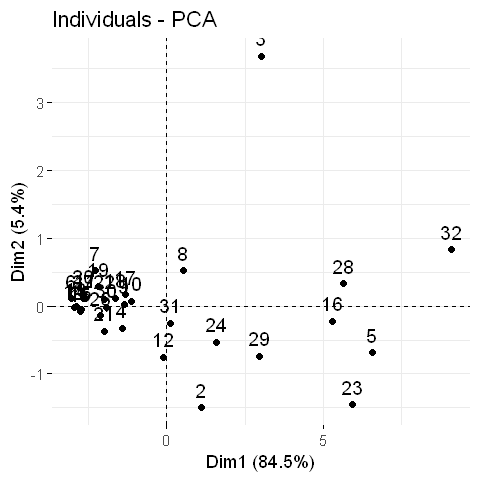

In [33]:
fviz_pca_ind(res.pca)

Like variables, it's also possible to color individuals by their cos2 values:

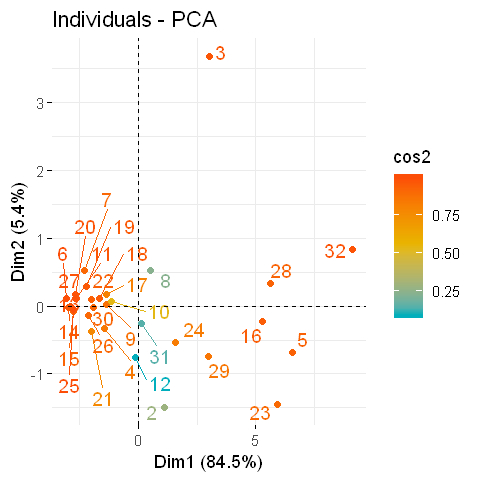

In [34]:
fviz_pca_ind(res.pca, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
            )

> Note that, individuals that are similar are grouped together on the plot.

You can also change the point size according the cos2 of the corresponding individuals:

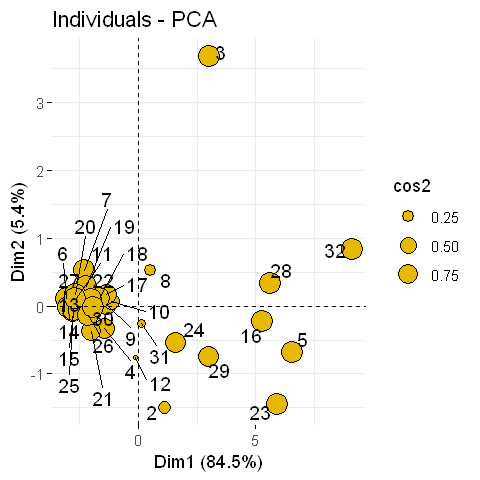

In [35]:
fviz_pca_ind(res.pca, pointsize = "cos2", 
             pointshape = 21, fill = "#E7B800",
             repel = TRUE # Avoid text overlapping (slow if many points)
            )

To change both point size and color by cos2, try this:

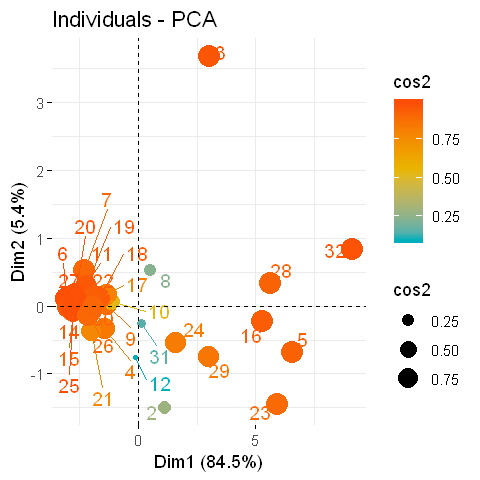

In [36]:
fviz_pca_ind(res.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
            )

To create a bar plot of the quality of representation (cos2) of individuals on the factor map, you can use the function fviz_cos2() as previously described for variables:

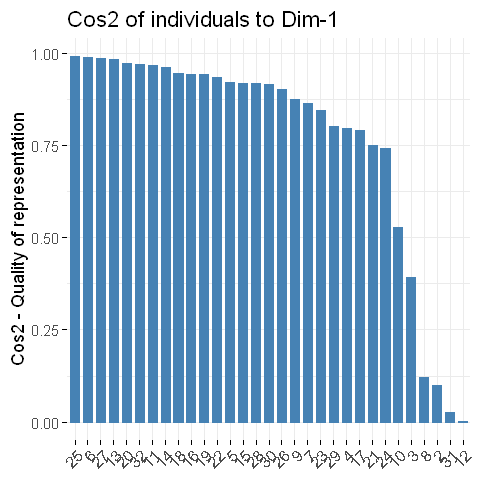

In [37]:
fviz_cos2(res.pca, choice = "ind")

To visualize the contribution of individuals to the first two principal components, type this:

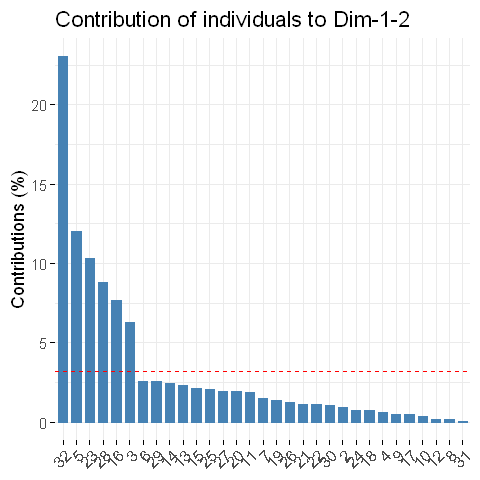

In [38]:
# Total contribution on PC1 and PC2
fviz_contrib(res.pca, choice = "ind", axes = 1:2)

## Color by a custom continuous variable
As for variables, individuals can be colored by any custom continuous variable by specifying the argument col.ind.

For example, type this:

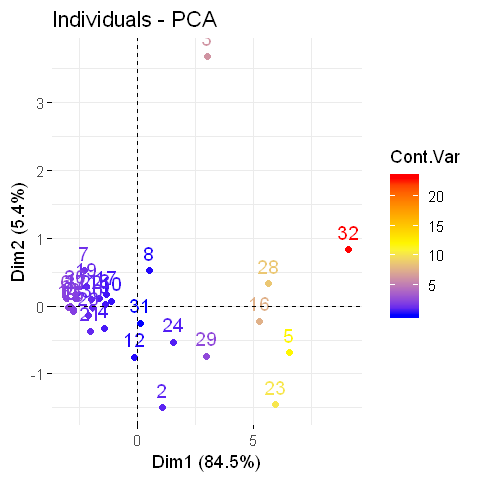

In [140]:
# Color individuals by the continuous variable
fviz_pca_ind(res.pca, col.ind = "contrib", gradient.cols = c("blue", "yellow", "red"), legend.title = "Cont.Var")

## Dimensions
By default, variables/individuals are represented on dimensions 1 and 2. If you want to visualize them on dimensions 2 and 3, for example, you should specify the argument axes = c(2, 3).

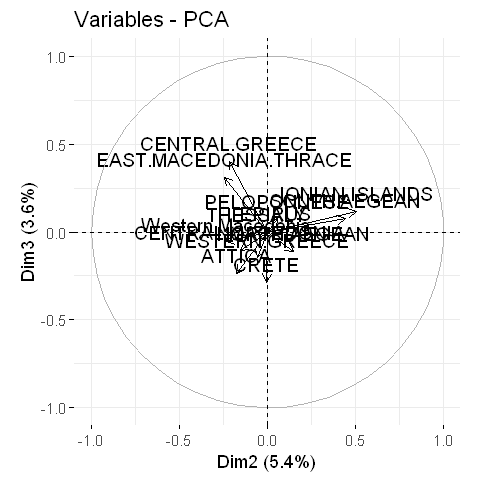

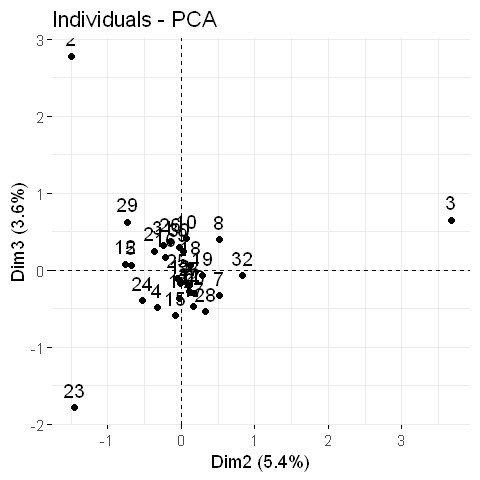

In [44]:
# Variables on dimensions 2 and 3
fviz_pca_var(res.pca, axes = c(2, 3))
# Individuals on dimensions 2 and 3
fviz_pca_ind(res.pca, axes = c(2, 3))

## Plot elements: point, text, arrow

The argument geom (for geometry) and derivatives are used to specify the geometry elements or graphical elements to be used for plotting.

1.  geom.var: a text specifying the geometry to be used for plotting variables. Allowed values are the combination of c("point", "arrow", "text").
* Use geom.var = "point", to show only points;
* Use geom.var = "text" to show only text labels;
* Use geom.var = c("point", "text") to show both points and text labels
* Use geom.var = c("arrow", "text") to show arrows and labels (default).

For example, type this:

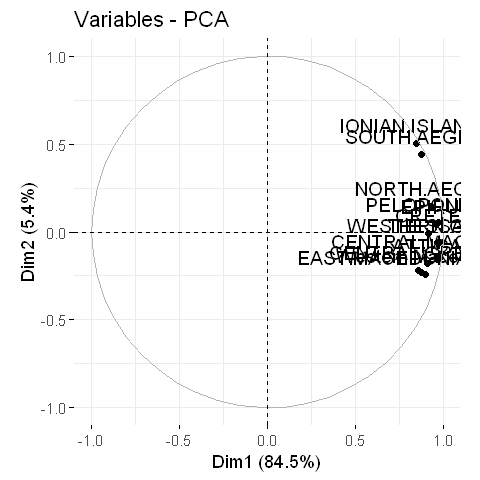

In [45]:
# Show variable points and text labels
fviz_pca_var(res.pca, geom.var = c("point", "text"))

2. geom.ind: a text specifying the geometry to be used for plotting individuals. Allowed values are the combination of c("point", "text").
* Use geom.ind = "point", to show only points;
* Use geom.ind = "text" to show only text labels;
* Use geom.ind = c("point", "text") to show both point and text labels (default)

For example, type this:

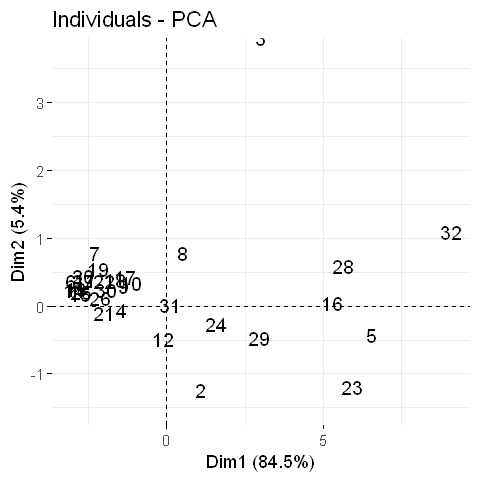

In [46]:
# Show individuals text labels only
fviz_pca_ind(res.pca, geom.ind =  "text")

## Size and shape of plot elements
1. labelsize: font size for the text labels, e.g.: labelsize = 4.
2. pointsize: the size of points, e.g.: pointsize = 1.5.
3. arrowsize: the size of arrows. Controls the thickness of arrows, e.g.: arrowsize = 0.5.
4. pointshape: the shape of points, pointshape = 21. Type ggpubr::show_point_shapes() to see available point shapes.

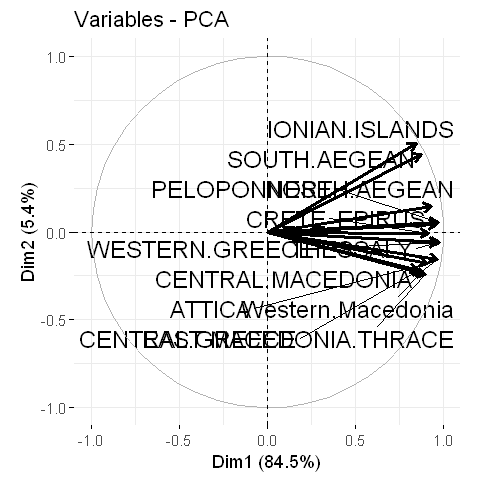

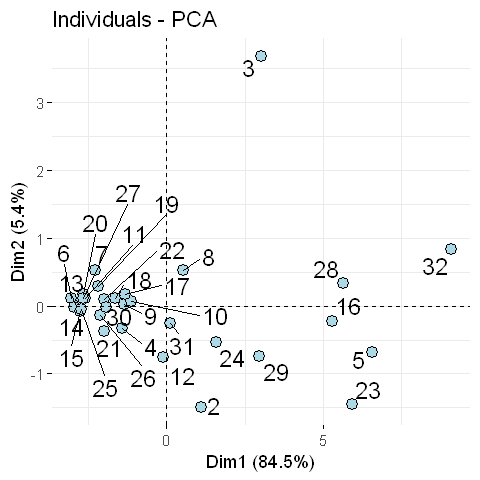

In [47]:
# Change the size of arrows an labels
fviz_pca_var(res.pca, arrowsize = 1, labelsize = 5, 
             repel = TRUE)
# Change points size, shape and fill color
# Change labelsize
fviz_pca_ind(res.pca, 
             pointsize = 3, pointshape = 21, fill = "lightblue",
             labelsize = 5, repel = TRUE)

## Axis lines
The argument axes.linetype can be used to specify the line type of axes. Default is "dashed". Allowed values include "blank", "solid", "dotted", etc. To see all possible values type ggpubr::show_line_types() in R.

To remove axis lines, use axes.linetype = "blank":

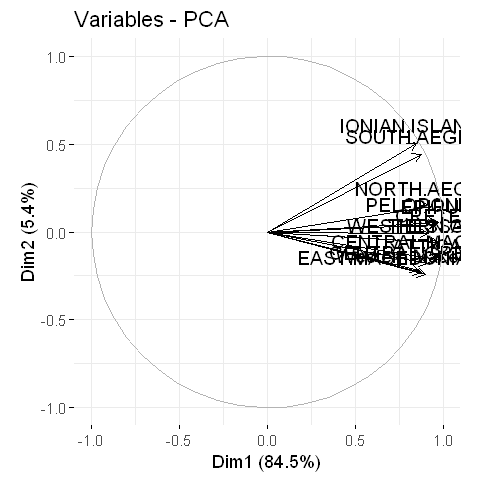

In [48]:
fviz_pca_var(res.pca, axes.linetype = "blank")

## Biplot
To make a simple biplot of individuals and variables, type this:

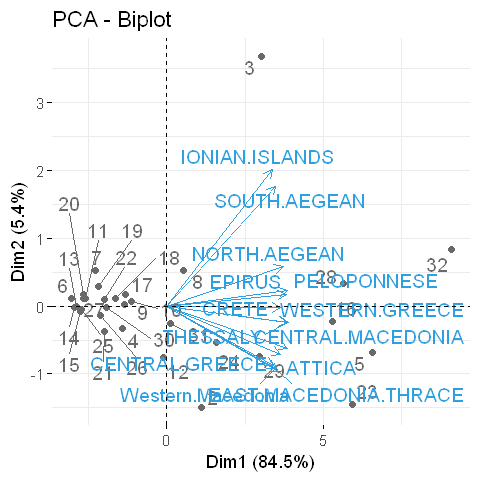

In [49]:
fviz_pca_biplot(res.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

For our 2nd excel file

We get the covariance matrix (aka, dispersion matrix), i.e., a matrix whose element in the (i,j) position is the covariance between the ith and jth elements of a random vector (that is, of a vector of random variables).

and we compute eigenvalues and eigenvectors

In [11]:
library("FactoMineR")
library("factoextra")
library("xlsx")

options(repr.plot.width=4, repr.plot.height=4)

covm <- read.xlsx("correlation_matrix_job_performance.xlsx", sheetIndex = 1, stringsAsFactors = FALSE)
head(covm)

cov.eig <- eigen(covm[2:14])

cov.eig

NA.,Communication.skills,Problem.Solving,Learning.Ability,Judgment.Under.Pressure,Observational.Skills,Willingness.to.Confront.Problems,Interest.in.People,Interpersonal.Sensitivity,Desire.for.Self.Improvement,Appearance,Dependability,Physical.Ability,Integrity
Communication Skills,1.0000,0.6280,0.5546,0.5538,0.5381,0.5265,0.4391,0.5030,0.5642,0.4913,0.5471,0.2192,0.5081
Problem Solving,0.6280,1.0000,0.5690,0.6195,0.4284,0.5015,0.3972,0.4398,0.4090,0.3873,0.4546,0.3201,0.3846
Learning Ability,0.5546,0.5690,1.0000,0.4892,0.6230,0.5245,0.2735,0.1855,0.5737,0.3988,0.5110,0.2269,0.3142
Judgment Under Pressure,0.5538,0.6195,0.4892,1.0000,0.3733,0.4004,0.6226,0.6134,0.4826,0.2266,0.5471,0.3476,0.5883
Observational Skills,0.5381,0.4284,0.6230,0.3733,1.0000,0.7300,0.2616,0.1655,0.5985,0.4177,0.5626,0.4274,0.3906
Willingness to Confront Problems,0.5265,0.5015,0.5245,0.4004,0.7300,1.0000,0.2233,0.1291,0.5307,0.4825,0.4870,0.4872,0.3260


eigen() decomposition
$values
 [1] 6.5474247 1.7727163 1.0051939 0.7431151 0.6783948 0.4513770 0.3821576
 [8] 0.2978128 0.2743935 0.2623892 0.2445734 0.1977489 0.1427026

$vectors
            [,1]        [,2]        [,3]        [,4]        [,5]        [,6]
 [1,] -0.3035526 -0.05203989 -0.32916104 -0.22701343  0.18113984 -0.41638803
 [2,] -0.2780361 -0.05703761 -0.40002700  0.30064208  0.45351272  0.09676766
 [3,] -0.2665282 -0.28814159 -0.35459935 -0.02077232 -0.21927894  0.57840417
 [4,] -0.2943744  0.19945238 -0.25523192  0.39729866 -0.03026419  0.10188717
 [5,] -0.2766502 -0.36697891  0.06599580  0.03561105 -0.32527825 -0.30129230
 [6,] -0.2675799 -0.39299257  0.09870056  0.18440271  0.03825580 -0.45868954
 [7,] -0.2780515  0.43291934  0.11815873  0.04595183 -0.11120135  0.03094768
 [8,] -0.2538168  0.49565194 -0.06455235 -0.05994025  0.10777382 -0.17028315
 [9,] -0.2998267 -0.09906215  0.06104674 -0.21142259 -0.42749585  0.10553594
[10,] -0.2373548 -0.19007516  0.24835714 -0.544417

These eigenvector will be the new basis vectors.

In [12]:
cov.eig$vectors[,1] %*% cov.eig$vectors[,2]  # should equals zero since they are orthogonal between themselves

1.037719e-16


If we look to the eigenvalues, the first is much larger than the second: the highest eigenvalue identifies the dataset’s principle component.

Once found the eigenvectors, we should order them decreasingly by their eigenvalues. This give us the components by order of significance! We can decide to ignore the components with less significance: we will lose information but not that much if their values are small.

So we start with a dataset of n dimensions, choose p components and get a new dataset with p dimensions representing the original dataset. The feature vector is the matrix of the eigenvectors we choose to keep.

This process of removing the less important axes can help reveal hidden, simplified dynamics in high dimensional data. This process is called dimensional reduction.

In [13]:
f.vector1 <- as.matrix(cov.eig$vectors[,1],ncol=1)  # feature vector with just one component
f.vector1

-0.3035526
-0.2780361
-0.2665282
-0.2943744
-0.2766502
-0.2675799
-0.2780515
-0.2538168
-0.2998267
-0.2373548
-0.3194778


In [14]:
f.vector2 <- as.matrix(cov.eig$vectors[,c(1,2)],ncol=2) # feature vector with both components
f.vector2

-0.3035526,-0.05203989
-0.2780361,-0.05703761
-0.2665282,-0.28814159
-0.2943744,0.19945238
-0.2766502,-0.36697891
-0.2675799,-0.39299257
-0.2780515,0.43291934
-0.2538168,0.49565194
-0.2998267,-0.09906215
-0.2373548,-0.19007516
-0.3194778,0.04974336


## Summary
In conclusion, we described how to perform and interpret principal component analysis (PCA). We computed PCA using the PCA() function [FactoMineR]. Next, we used the factoextra R package to produce ggplot2-based visualization of the PCA results.